### Лабораторная работа №2. Методы стеганоанализа

Пчелкина Ю.Ж., группа 6231-010402D

Чаплыгин А.О., группа 6231-010402D





#### Создание датасета

1. Реализовать процедуру расчёта векторов признаков, используемых для стегоанализа.

2. Выполнить имитацию работы стегосистемы для первых 𝐾2⁄ изображений: встроить в каждое изображение в качестве стеганографической информации отдельную реализацию равномерного белого шума (число бит определяется текущим значением 𝑞). Вторую половину изображений не менять.


- входными данными, необходимыми для выполнения лабораторной работы, являются 𝐾 полутоновых изображений одного размера.

- стеганографическая система: НЗБ встраивание (запись по псевдослучайным координатам, 1-я битовая плоскость)
    
- метод стеганоанализа: Метод длин серий (в качестве признаков - количество серий длин от 5 до 12)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import random
from random import random, randrange, randint

from operator import itemgetter

import os, sys
import pandas as pd

In [2]:
# процент пикселов, в которых будут изменения (размер сообщения)

def count_of_change(image, percent):
    return round(img.size/100)*percent


In [3]:
# Заданное количество пикселов сообщения нужно разместить среди всех пикселов исходного изображения.
# Генерируем случайные числа - ключ для кодирования и декодирования

def generate_location(image, message_size):
    image_size = image.size
    location = np.random.permutation(np.arange(0, image_size))[:message_size]
    return location


In [4]:
# в нашем случае сообщение - равномерный белый шум
def encode1 (image, location):
    img_flatten = image.flatten()
     
        
    # находим пикселы по ключу
    for k in location:
        a = img_flatten[k]
        
        # случайный выбор 0 или 1 (черный или белый)
        noise = randint(0, 1)
        
        # строковое представление числа в двоичной системе
        a = np.binary_repr(a, width=8)
        noise = np.binary_repr(noise, width=8)
        
        # заменяем младший бит
        xor_a_noise = int(a[7]) ^ int(noise[7])
        
        new = a[:-1] + str(xor_a_noise)
        
        # записываем в формате uint8
        new = (int(new, 2))
        
        img_flatten[k] = new
    
    
    img_new = np.reshape(img_flatten, image.shape)    
    return img_new    


In [5]:
# в нашем случае сообщение - равномерный белый шум
def encode2 (image, location):
    img_flatten = image.flatten()
     
    # находим пикселы по ключу
    for k in location:
        a = img_flatten[k]
        
        # случайный выбор 0 или 1 (черный или белый)
        noise = randint(0, 1)
        
        # строковое представление числа в двоичной системе
        a = np.binary_repr(a, width=8)
        noise = np.binary_repr(noise, width=8)
        
        # заменяем младший бит
        new = a[:-1] + noise[7]
        
        # записываем в формате uint8
        new = (int(a, 2))
        
        img_flatten[k] = new
    
    
    img_new = np.reshape(img_flatten, image.shape)    
    return img_new    


In [6]:
# Вкачестве вектора признаков возьмем набор серий длин от 1 до 12. 
# Серия - последовательность младших бит, состоящая из одинаковых элементов (0 или 1)
# У пустых контейнеров количество таких серий ожидается больше начиная с длины 5-6

def img_series(image):
    img_flatten = image.flatten()

    # все переводим в двоичную и записываем в одну строку
    res = ''
    for a in img_flatten:
        a = np.binary_repr(a, width=8)
        res = res + a[7]

    # количество одинаковых числе
    ch_count = 1
    
    # список длин цепочек одинаковых чисел
    list_of_series_length = []
    
    for ch in range(len(res) - 1):
        if res[ch] == res[ch + 1]:
            ch_count += 1
        else:
            list_of_series_length.append(ch_count)
            ch_count = 1
            
    list_of_series_length.append(ch_count)
    
    # считаем количество, сортируем
    dict_series = {}
    for series in list_of_series_length:
        flag = dict_series.get(series)
        if flag == None:
            dict_series[series] = 1
        else:
            dict_series[series] += 1
    
    dict_series_new = {k: v for k, v in dict_series.items() if k < 13}
    
    dict_series_sort = dict(sorted(dict_series_new.items(), key = itemgetter(1), reverse = True))
  
    return (dict_series_sort)


In [7]:
# продемонстрируем для одного изображения

# считали изображение
img = cv2.imread('Image00001.tif', 0)

percent = 35


pixel_change = count_of_change(img, percent)
print(pixel_change)
location = generate_location(img, pixel_change)
print(location)
img_with_massage = encode1(img, location)
img_difference = img_with_massage - img


print(img_series(img))
print(img_series(img_with_massage))

91735
[ 76195 261710 174141 ... 148626 163394 183746]
{1: 62397, 2: 31528, 3: 15918, 4: 8202, 5: 4375, 6: 2224, 7: 1114, 8: 637, 9: 369, 10: 180, 11: 102, 12: 59}
{1: 64038, 2: 32283, 3: 16223, 4: 8278, 5: 4173, 6: 2070, 7: 1059, 8: 629, 9: 293, 10: 149, 11: 78, 12: 36}


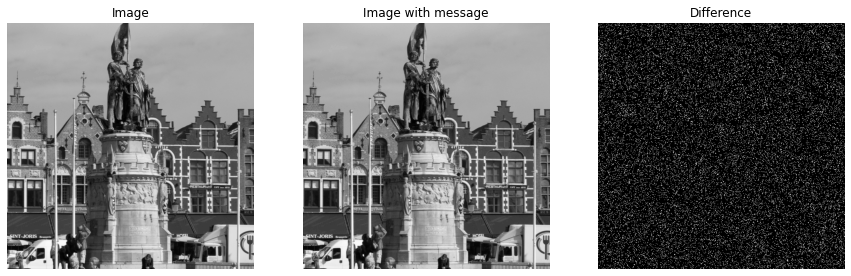

In [8]:
plt.figure(figsize=(15,15))

plt.subplot(1, 3, 1)
plt.axis('off')
plt.title('Image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.axis('off')
plt.title('Image with message')
plt.imshow(img_with_massage, cmap='gray')

plt.subplot(1, 3, 3)
plt.axis('off')
plt.title('Difference')
plt.imshow(img_difference, cmap='gray')

plt.show()

In [9]:
def create_dataset (percent, dir_name):
    # создаем пустой датасет
    df_title = {'Image Name': [], 'series length 1': [], 'series length 1': [],
                'series length 2': [], 'series length 3': [],'series length 4': [],
                'series length 5': [], 'series length 6': [], 'series length 7': [],
                'series length 8': [], 'series length 9': [], 'series length 10': [],
                'series length 11': [],'series length 12': [], 'with message': []}
    df = pd.DataFrame(df_title)

    # имя новой папки
    new_dir_name = 'Data' + str(percent) + '/'
    if os.path.exists(new_dir_name) == False:
        os.mkdir(new_dir_name)

    
    # в первые 50% зашифровываем сообщение, считаем длины серий. Метка "with message" = 1
    pictures = os.listdir(dir_name)
    len_1 = len(pictures) // 2
    
    list_df1 = []

    for k in range(len_1):
        im = cv2.imread(f'{dir_name}{pictures[k]}', 0)
        if type(im) == np.ndarray:
            # процент занимаемый сообщением
            pixel_change = count_of_change(im, percent)
            # местоположение сообщения на изображении
            location = generate_location(im, pixel_change)
            # кодируем сообщение
            img_with_massage = encode1(im, location)
        
            list_series1 = img_series(img_with_massage)
            list_df1.append({'Image Name': pictures[k], 'series length 1': list_series1[1],
                        'series length 1': list_series1[1],'series length 2': list_series1[2],
                        'series length 3': list_series1[3],'series length 4': list_series1[4],
                        'series length 5': list_series1[5],'series length 6': list_series1[6],
                        'series length 7': list_series1[7],'series length 8': list_series1[8],
                        'series length 9': list_series1[9],'series length 10': list_series1[10],
                        'series length 11': list_series1[11],'series length 12': list_series1[12],
                        'with message': 1})

            # сохраняем измененное в новую папку
            cv2.imwrite(f'{new_dir_name}{pictures[k]}', img_with_massage)
    
    
    # для оставшихся 50% считаем длины серий. Метка "with message" = 0
    list_df2 = []
    for k in range(len_1, len(pictures)):
        im = cv2.imread(f'{dir_name}{pictures[k]}', 0)
        if type(im) == np.ndarray:
            list_series2 = img_series(im)
            list_df2.append({'Image Name': pictures[k], 'series length 1': list_series2[1],
                        'series length 1': list_series2[1],'series length 2': list_series2[2],
                        'series length 3': list_series2[3],'series length 4': list_series2[4],
                        'series length 5': list_series2[5],'series length 6': list_series2[6],
                        'series length 7': list_series2[7],'series length 8': list_series2[8],
                        'series length 9': list_series2[9],'series length 10': list_series2[10],
                        'series length 11': list_series2[11],'series length 12': list_series2[12],
                        'with message': 0})
            
            # сохраняем измененное в новую папку
            cv2.imwrite(f'{new_dir_name}{pictures[k]}', im)
    
    df = df.append(list_df1)
    df = df.append(list_df2)
    return df

In [10]:
df2 = create_dataset (35, 'BOWS2/')
# сохраняем
df2.to_csv('LSB_20.csv', index=False)

C:\Users\Barova\AppData\Local\Temp/ipykernel_1912/333245793.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(list_df1)
C:\Users\Barova\AppData\Local\Temp/ipykernel_1912/333245793.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(list_df2)


In [11]:
df3 = create_dataset (40, 'BOWS2/')
# сохраняем
df3.to_csv('LSB_30.csv', index=False)

C:\Users\Barova\AppData\Local\Temp/ipykernel_1912/333245793.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(list_df1)
C:\Users\Barova\AppData\Local\Temp/ipykernel_1912/333245793.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(list_df2)


In [12]:
df4 = create_dataset (40, 'BOWS2/')
# сохраняем
df4.to_csv('LSB_40.csv', index=False)

C:\Users\Barova\AppData\Local\Temp/ipykernel_1912/333245793.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(list_df1)
C:\Users\Barova\AppData\Local\Temp/ipykernel_1912/333245793.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(list_df2)


In [13]:
df5 = create_dataset (50, 'BOWS2/')
# сохраняем
df5.to_csv('LSB_50.csv', index=False)

C:\Users\Barova\AppData\Local\Temp/ipykernel_1912/333245793.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(list_df1)
C:\Users\Barova\AppData\Local\Temp/ipykernel_1912/333245793.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(list_df2)


In [14]:
df6 = create_dataset (60, 'BOWS2/')
# сохраняем
df6.to_csv('LSB_60.csv', index=False)

C:\Users\Barova\AppData\Local\Temp/ipykernel_1912/333245793.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(list_df1)
C:\Users\Barova\AppData\Local\Temp/ipykernel_1912/333245793.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(list_df2)


In [15]:
df7 = create_dataset (70, 'BOWS2/')
# сохраняем
df7.to_csv('LSB_70.csv', index=False)

C:\Users\Barova\AppData\Local\Temp/ipykernel_1912/333245793.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(list_df1)
C:\Users\Barova\AppData\Local\Temp/ipykernel_1912/333245793.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(list_df2)


In [16]:
df8 = create_dataset (80, 'BOWS2/')
# сохраняем
df8.to_csv('LSB_80.csv', index=False)

C:\Users\Barova\AppData\Local\Temp/ipykernel_1912/333245793.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(list_df1)
C:\Users\Barova\AppData\Local\Temp/ipykernel_1912/333245793.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(list_df2)


In [17]:
df9 = create_dataset (90, 'BOWS2/')
# сохраняем
df9.to_csv('LSB_90.csv', index=False)

C:\Users\Barova\AppData\Local\Temp/ipykernel_1912/333245793.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(list_df1)
C:\Users\Barova\AppData\Local\Temp/ipykernel_1912/333245793.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(list_df2)


In [18]:
df10 = create_dataset (100, 'BOWS2/')
# сохраняем
df10.to_csv('LSB_100.csv', index=False)

C:\Users\Barova\AppData\Local\Temp/ipykernel_1912/333245793.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(list_df1)
C:\Users\Barova\AppData\Local\Temp/ipykernel_1912/333245793.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(list_df2)
